In [1]:
using PyPlot

# Mean and variance

Suppose we have a black box (a **distribution**) that generates data points $x_k$ (**samples**) $k = 1,\ldots,$.   If we have $n$ data points, the **sample mean m** is simply the average:

$$
m = \frac{1}{n}\sum_{k=1}^\infty x_k
$$

In the limit $n \to \infty$, we get the mean μ of the underlying distribution from which the samples are generated.

The **sample variance S²** is the mean-square deviation from the mean:

$$
\operatorname{Var}(x) = S^2 = \frac{1}{n-1}\sum_{k=1}^\infty (x_k - m)^2
$$

where the denominator $n-1$ is [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).  The limit $n\to\infty$ of the sample variance gives $\sigma^2$, the variance of the underlying distribution, and by using $n-1$ instead of $n$ in the denominator it turns out that we get a better estimate of $\sigma^2$ when $n$ is not huge.

For example, the `randn()` function in Julia draws samples from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution): a Gaussian or "bell curve" with mean zero and variance 1:

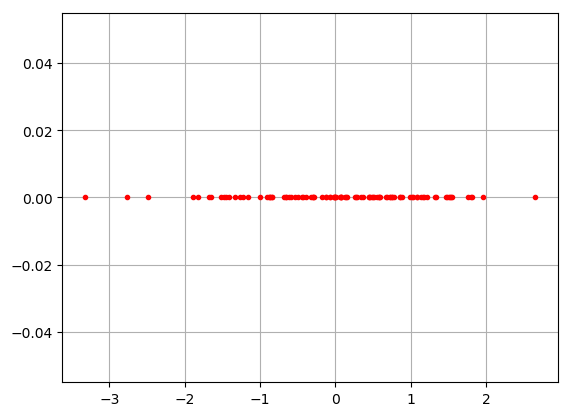

In [2]:
x = randn(100) # 100 gaussian random numbers:
plot(x, zeros(x),"r.")
grid()

It is more informative to plot a [histogram](https://en.wikipedia.org/wiki/Histogram):

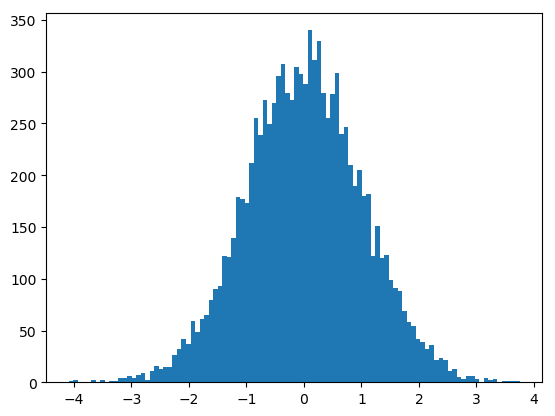

In [3]:
x = randn(10000)
plt[:hist](x, bins=100);

The mean is the **center** of this peak and the square root $S$ of the variance is a measure of the **width** of this peak.

The mean of those 10000 samples is a pretty good estimate for the true mean (= 0) of the underlying normal distribution:

In [4]:
mean(x)

0.007294945069045852

The sample variance is:

In [5]:
sum((x.-mean(x)).^2)/(length(x)-1)

1.0206585705208338

Or (equivalently but more efficient) the built-in function `var`:

In [6]:
var(x)

1.0206585705208338

which is a pretty good estimate for the true variance (= 1).

If we looked at more points, we would get better estimates:

In [7]:
xbig = randn(10^7)
mean(xbig), var(xbig)

(-9.954708185954699e-5, 1.000150818170127)

## Mean and variance in linear algebra

If we define the vector $o = (1,1,\ldots)$ to be the vector of $n$ 1's, with $o^T o = n$, then the mean of $x$ is:

$$
m = \frac{o^T x}{o^T o}
$$

which is simply the coefficient in the **projection $o\frac{o^Tx}{o^To} = om$ of x onto the line spanned by o**.   And the sample variance is

$$
\operatorname{Var}(x) = \frac{\Vert x - m o \Vert^2}{n-1} = \frac{\left\Vert \left(I - \frac{o o^T}{o^T o} \right) x \right\Vert^2}{n-1}
$$

is the **length² of the projection of x orthogonal to o** divided by $n-1$.

In fact, the $n-1$ denominator is closely related to the fact that this orthogonal projection "lives" in an $n-1$ dimensional space: after you subtract off the mean, there are only $n-1$ degrees of freedom left.   (This is just a handwaving argument; for more careful derivations of this denominator, see e.g. [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) on Wikipedia.)

# Covariance and Correlation

A key question in statistics is whether/how two sets of data are **correlated**.   If you have two variables $x$ and $y$, do they tend to "move together"?

An intuitive measure for this is: **when x is greater/less than its mean, is y *also* greater/less than its mean?**   Translated into math, this leads to the **covariance**:

$$
\operatorname{Covar}(x,y) = \frac{1}{n-1}\sum_{k=1}^n (x_k - \operatorname{mean}(x)) (y_k - \operatorname{mean}(y)) = \frac{(Px)^T (Py)}{n-1} = \frac{x^T P y}{n-1}
$$

where $P = I - \frac{oo^T}{o^T o}$ is the projection operator from above that subtracts the mean from a vector (i.e. it projects vectors onto the subspace of vectors with zero mean).  (In the last step we used the facts that $P^T = P$ and $P^2 = P$.)

For example, here are plots of two very correlated vectors x and y of data and a third data set z that is just independent random numbrers

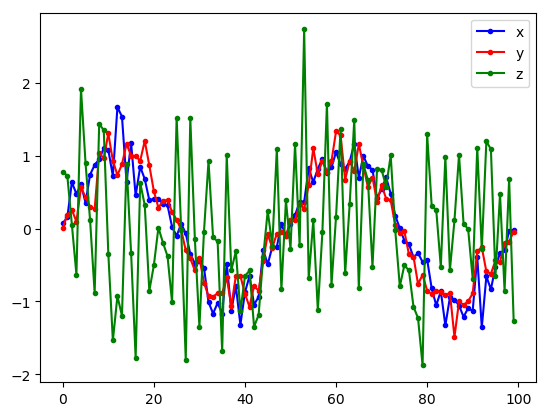

PyObject <matplotlib.legend.Legend object at 0x11a9cd390>

In [8]:
x = sin.(linspace(0,4π,100) .+ randn(100)*0.1) .* (1 .+ 0.3*randn(100))
y = sin.(linspace(0,4π,100) .+ randn(100)*0.1) .* (1 .+ 0.3*randn(100))
z = randn(100)
plot(x, "b.-")
plot(y, "r.-")
plot(z, "g.-")
legend(["x","y","z"])

All three have mean nearly zero:

In [9]:
mean(x),mean(y),mean(z)

(0.013040111712870606, 0.023757834395212032, -0.00869840849076276)

But the covariance of x and y is totally different from the covariance of x and z:

In [10]:
# A simple covariance function.  See https://github.com/JuliaStats/StatsBase.jl for
# better statistical functions in Julia.
covar(x,y) = dot(x .- mean(x), y .- mean(y)) / (length(x) - 1)

covar (generic function with 1 method)

In [11]:
covar(x,y), covar(x,z)

(0.507129185295783, 0.08801417892608565)

The variance and covariance have the units of the data squared.  I can make the covariance of x and y smaller simply by dividing y by 10, which doesn't see like a good measure of how correlated they are.

Often, it is nicer to work with a dimensionless quantity *independent* of the vector lengths, the **correlation**:

$$
\operatorname{Cor}(x,y) = \frac{\operatorname{Covar}(x,y)}{\sqrt{\operatorname{Var}(x)  \operatorname{Var}(y)}} = \frac{(Px)^T (Py)}{\Vert Px \Vert \; \Vert Py \Vert}
$$

This is just the dot product of the vectors (after subtracting their means) divided by their lengths.

It turns out that Julia has a built-in function `cor` that compute precisely this:

In [12]:
covar(x,y) / sqrt(covar(x,x) * covar(y,y)) # correlation, manually computed

0.9250303845252711

In [13]:
cor(x,y)

0.9250303845252712

In [14]:
cor(x,z)

0.12279755330665447

In [15]:
abs(cor(x,y)/cor(x,z))

7.532970809404093

Now that we've scaled out the overall length of the vectors, we can sensibly compare the correlation of x,y with the correlation of x,z, and we see that the former are more than 10x the correlation of the latter in this sample

# The covariance and correlation matrices

If we have a bunch of data sets, we might want the covariance or correlation of *every* pair of data sets.   Since these are basically dot products, asking for *all* of the dot products is the same as asking for a **matrix multiplication**.

In particular, suppose that $X$ is the $m \times n$ matrix whose **rows** are $n$ different datasets of length $n$.   First, we need to subtract off the means of each row to form a new matrix $A$:

$$
A = X P = X P^T = (PX^T)^T
$$

where $P$ is the projection matrix from above that subtracts the mean.  Multiplying by $P^T = P$ on the *right* corresponds to projecting each *row* of $X$.

Given $A$, we can compute **all** of the covariances simply by computing the **covariance matrix S**

$$
S = \frac{A A^T}{n-1}
$$

since $A A^T$ computes all of the dot products of all of the rows of $A$.  The diagonal entries of $S$ are the variances of each dataset, and the off-diagonal elements are the covariances.

Alternatively, we can compute the **correlation matrix** $C = \hat{A} \hat{A}^T$, where $\hat{A}$ is simply the matrix $A$ scaled so that each row has unit length.  i.e. $\hat{A} = DA$, where $D$ is a diagonal matrix whose entries are the inverse of the length of each row, i.e. $D$ is the inverse of the diagonal entries of $AA^T$.

Let's look in more detail at the two correlated vectors $x$ and $y$ from above:

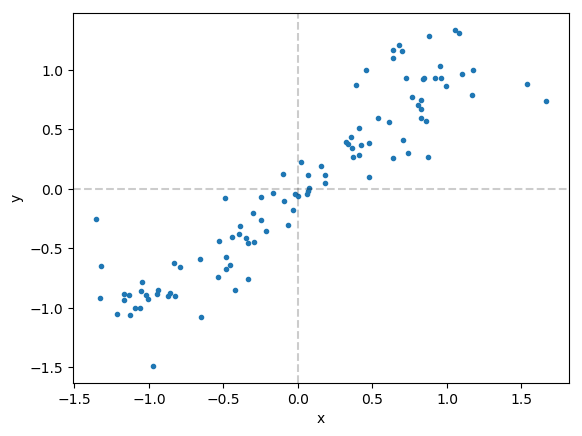

PyObject <matplotlib.lines.Line2D object at 0x13bebcf50>

In [16]:
plot(x,y, ".")
xlabel("x")
ylabel("y")
axhline(0, linestyle="--", color="k", alpha=0.2)
axvline(0, linestyle="--", color="k", alpha=0.2)

The correlation matrix is:

In [17]:
A = [x' .- mean(x); y' .- mean(y)] # rows are x and y with means subtracted

2×100 Array{Float64,2}:
  0.0588795  0.143958  0.622997  …  -0.312787  -0.0452121  -0.0332338
 -0.0176935  0.165568  0.233897     -0.223157  -0.202929   -0.0645328

In [18]:
S = A * A' / (length(x)-1)

2×2 Array{Float64,2}:
 0.577009  0.507129
 0.507129  0.520886

In this case, since there are only two datasets, $S$ is just a $2 \times 2$ matrix.

# PCA: diagonalizing the covariance matrix

A key question in analyizing data analysis is to figure out **which variables are responsible for most of the variation in the data**.    These may not be the variables you measured, but may instead be some **linear combination of the measured variables**!

Mathematically, this corresponds to **diagonalizing the covariance (or correlation) matrix**:

* $S$ is real-symmetric and positive-definite (or at least semidefinite), so diagonalization $S=Q \Lambda Q^T$ finds real, positive eigenvalues $\lambda_k = \sigma_k^2 \ge 0$ and an **orthonormal basis Q of eigenvectors**.

* The eigenvectors form a **coordinate system** in which the covariance matrix **S becomes diagonal**, i.e. a **coordinate system in which the variables are uncorrelated**.

* The diagonal entries in this coordinate system, the eigenvalues, are the **variances of these uncorrelated components**.

This process of diagonalizing the covariance matrix is called [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), or **PCA**.

Let's try it:

In [19]:
σ², Q = eig(S)

([0.0410425, 1.05685], [0.687296 -0.726378; -0.726378 -0.687296])

We see that the second eigenvector is responsible for almost all of the variation in the data, because its eigenvalue (the variance $\sigma^2$) is much larger:

In [20]:
σ²

2-element Array{Float64,1}:
 0.0410425
 1.05685  

Let's plot these two eigenvectors on top of our data:

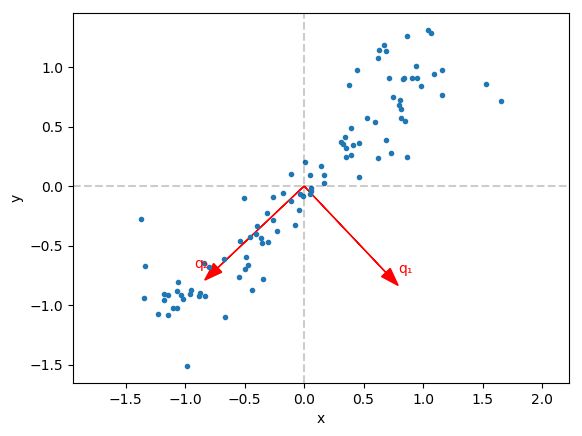

(-1.5218295014216714, 1.8060824741790402, -1.6529723264011957, 1.4535587645302797)

In [21]:
plot(x.-mean(x),y.-mean(y), ".")
xlabel("x")
ylabel("y")
axhline(0, linestyle="--", color="k", alpha=0.2)
axvline(0, linestyle="--", color="k", alpha=0.2)
arrow(0,0, Q[:,1]..., head_width=0.1, color="r")
arrow(0,0, Q[:,2]..., head_width=0.1, color="r")
text(Q[1,1]+0.1,Q[2,1], "q₁", color="r")
text(Q[1,2]-0.2,Q[2,2], "q₂", color="r")
axis("equal")

The $q_2$ direction, corresponding to the biggest eigenvalue of the covariance matrix, is indeed the direction with the biggest variation in the data!

In this case, it is along the (1,1) direction because $x$ and $y$ tend to move together.

The other direction $q_1$ is the other uncorrelated (= orthogonal) direction of variation in the data.  Not much is going on in that direction.

(In fact, this $q_2$ can be viewed as a kind of "best fit" line which the Strang book calls [perpendicular least squares](http://mathworld.wolfram.com/LeastSquaresFittingPerpendicularOffsets.html), and is also called [Deming regression](https://en.wikipedia.org/wiki/Deming_regression).)

# PCA and the SVD

Instead of forming $A A^T$ and diagonalizing that, we can equivalently (in the absence of roundoff errors) us the singular value decomposition (SVD) of $A/\sqrt{n-1}$.  Recall the SVD

$$
\frac{A}{\sqrt{n-1}} = U \Sigma V^T
$$

where $U$ and $V$ are orthogonal matrices and $\Sigma = \begin{pmatrix} \sigma_1 & & \\ & \sigma_2 & \\ & & \ddots \end{pmatrix}$ is a diagonal $m\times n$ matrix of the singular values $\sigma_k$.

Then, if we compute the covariance matrix , we get:

$$
S = \frac{A A^T}{n-1} = (U \Sigma V^T) (U \Sigma V^T)^T  = U \Sigma V^T V \Sigma^T U^T  = U \Sigma \Sigma^T U^T
$$

Since $\Sigma \Sigma^T$ is a diagonal matrix of the *squares* $\sigma_k^2$ of the singular values $\sigma_k$, we find:

* The squares $\sigma_k^2$ of the singular values are the variances of the uncorrelated components of the data (the eigenvalues of $S$).
* The left singular vectors $U$ are **precisely** the orthonormal eigenvectors of $A A^T$, i.e. the uncorrelated components of the data.

In practice, PCA typically uses the SVD directly rather than explicitly forming the covariance matrix $S$.  (It turns out that computing $A A^T$ explicitly exacerbates sensitivity to rounding errors and other errors in $A$.)

In [22]:
U, σ, V = svd(A / sqrt(length(x)-1))

([-0.726378 -0.687296; -0.687296 0.726378], [1.02803, 0.202589], [-0.00299234 -0.0264517; -0.0213478 0.010578; … ; 0.0168459 -0.0577103; 0.00669613 -0.011923])

In [23]:
σ.^2

2-element Array{Float64,1}:
 1.05685  
 0.0410425

As promised, this is the same as the eigenvalues of $S$ from above.

Conveniently, the convention for the SVD is to sort the singular values in descending order $\sigma_1 \ge \sigma_2 \ge \cdots$.    So, the **first** singular value/vector represents *most* of the variation in the data, and so on.

In [24]:
U

2×2 Array{Float64,2}:
 -0.726378  -0.687296
 -0.687296   0.726378

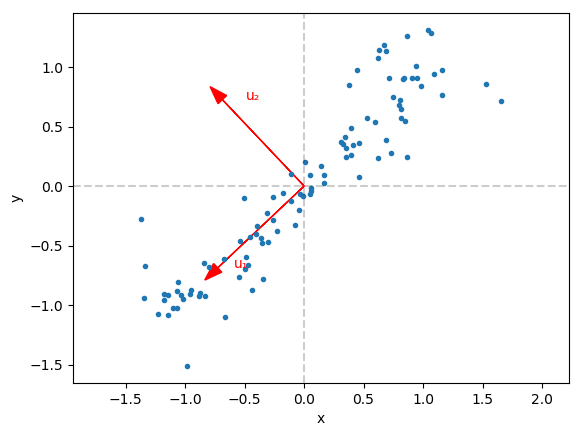

(-1.5218295014216714, 1.8060824741790402, -1.6529723264011957, 1.4535587645302797)

In [25]:
plot(x.-mean(x),y.-mean(y), ".")
xlabel("x")
ylabel("y")
axhline(0, linestyle="--", color="k", alpha=0.2)
axvline(0, linestyle="--", color="k", alpha=0.2)
arrow(0,0, U[:,1]..., head_width=0.1, color="r")
arrow(0,0, U[:,2]..., head_width=0.1, color="r")
text(U[1,2]+0.1,U[2,1], "u₁", color="r")
text(U[1,2]+0.2,U[2,2], "u₂", color="r")
axis("equal")

There may be an irrelevant sign flip from before (the signs of the eigenvectors and singular vectors are arbitrary), but otherwise it is the same.